# MMAE350 Homework 2
Jay Steinberg

**No code was shared with anyone for any of these questions.**


## Q1: 

Consider vectors:

> $v(r) = \sin(r) + r^2 + 1$

a) Find the expressions for $\frac{dv}{dr}, \frac{d^2v}{dr^2}, \frac{d^3v}{dr^3}$

> These were found by hand: 

> $\frac{dv}{dr} = \cos(r) + 2r$

> $\frac{d^2v}{dr^2} = -\sin(r) + 2$

> $\frac{d^3v}{dr^3} = -\cos(r) $

b) Plot $v$ in the range $-\pi \le r \le \pi$. $v$ should be on the vertical axis and $r$ should be on the horizontal axis.


In [129]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import math
from scipy.optimize import fsolve
import scipy.optimize as op

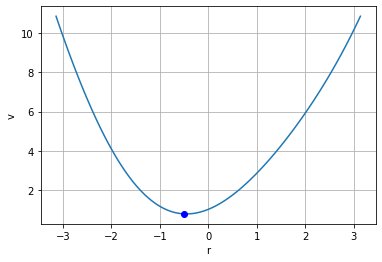

In [130]:
r = np.linspace(-np.pi,np.pi,num=100)

def v(x):
  y = np.sin(x) + x**2 + 1
  return y

plt.plot(r,v(r),-0.5,v(-0.5),'bo')
plt.xlabel('r')
plt.ylabel('v')
plt.grid(True)
plt.show()

c) Through visual inspection of the plot, determine the value of $r$ for which $v$ is minimum

> By visual inspection, the minimum point of $v$ on this domain appears to be about $r=-0.5$

d) Plot $w = \frac{dr}{dv}$ for $-\pi \le r \le \pi$. At what value of $r$ is $w = 0$? How does the answer compare with the answer in part c? If the answers are close to each other, explain why?

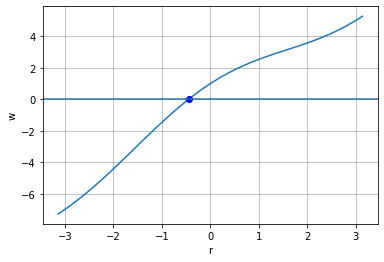

In [131]:
def w(x):
  y = np.cos(x) + 2*x
  return y

plt.plot(r,w(r),-0.45,w(-0.45),'bo')
plt.axhline(y=0) # Plotted horizontal line at y=0 for better visual comparison
plt.xlabel('r')
plt.ylabel('w')
plt.grid(True)
plt.show()

> Once again, it appears that the critical point is near the original inspected location at approximately $r = -0.45$. This is expected, since any local minima or maxima of a given function will occur when the first derivative of that function (its slope) evaluates to zero, by definition.

##Q2:
Plot the function $z = \sin(xy) + \cos(xy)$ where $x, y$ are the usual orthogonal axes. You can plot $z$ over a grid of $x, y$. I am leaving the range of the grid and the discretization open ended in this question. Choose your best judgment and make sure that the plot is clear.



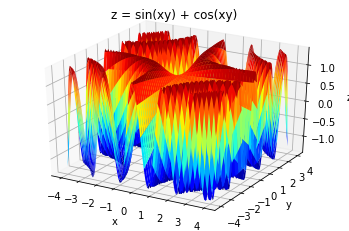

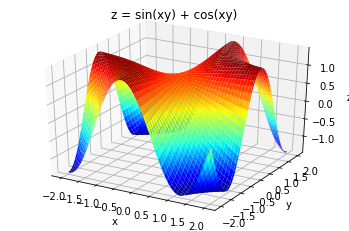

In [132]:
def z_function(x, y):
  return (np.sin(x*y) + np.cos(x*y))

ax1 = plt.axes(projection="3d")

x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax1.plot_surface(X, Y, Z, cmap='jet')
ax1.set_title("z = sin(xy) + cos(xy)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
plt.show()

# second plot with tighter domain (-2,2) for (x,y)
ax2 = plt.axes(projection='3d')

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax2.plot_surface(X, Y, Z, cmap='jet')
ax2.set_title("z = sin(xy) + cos(xy)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

plt.show()

> Note: I tried several different step counts for the $x, y$ mesh. No significant additional clarity comes out of using more than 100 steps over a $(-4,4)$ domain for $x$ and $y$. Additionally, the graph becomes nearly unreadable with a domain much larger than that due to the multiplication of $x$ and $y$ in each term.

> In order to more easily discern the saddle surface towards the center, I have included a second plot over domain $(-2,2)$ for $x$ and $y$.

##Q3.

Consider the function $y = \sin(x) + \cos(x)$

a) Plot the function for $0 \le x \le 2\pi$

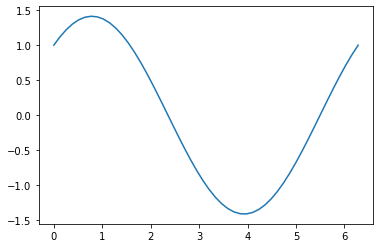

In [133]:
x = np.linspace(0, np.pi*2, 50)
yfunc = (np.sin(x) + np.cos(x))

plt.plot(x,yfunc)

b) Approximate the function with the first 2, 3, 4, 5, and 6 terms of its Taylor series expansion about point $x_0 = 0$. Let’s call these approximations $y_2, y_3, y_4, y_5, y_6$ respectively. Plot $y, y_2, y_3, y_4, y_5, y_6$
for $0\le x \le 2\pi$ showing the approximation improving as more terms are
taken into consideration in the Taylor series.

> The Taylor expansion is initially done by hand for $n$ terms:

> $T(x) = y(x_o) + (x-x_o) \frac{dy}{dx}|_{x_o}) + \frac{(x-x_0)^2}{2!}\frac{d^2x}{dy^2}|_{x_o} + ... +  \frac{(x-x_0)^n}{n!}\frac{d^nx}{dy^n}|_{x_o}$

From here I will use $y' = \frac{dy}{dx}$ (prime notation) for expediency.

In our case, $ y = \sin(x) + \cos(x)$, therefore

> $y' = \cos(x) - \sin(x),$

> $y'' = -\sin(x) - \cos(x), $

> $y'''= -\cos(x)+\sin(x), $

> $y^{(4)}= \sin(x)+\cos(x), $

> $y^{(5)}= \cos(x)-\sin(x), $

And from this we can build the Taylor expansion around our $x_0=0$ to 6 terms:

> $T(x)=[\sin(x_0)+cos(x_0)] + (x-x_0)[\cos(x_0) - \sin(x_0)] + \frac{(x-x_0)^2}{2!}[-\sin(x_0) - \cos(x_0)] + \frac{(x-x_0)^3}{3!}[-\cos(x_0)+\sin(x_0)] + \frac{(x-x_0)^4}{4!}[\sin(x_0)+\cos(x_0)] + \frac{(x-x_0)^5}{5!}[\cos(x_0)-\sin(x_0)] $

We can use increasing numbers of terms to define better approximations:

> (2 terms) $ y_2 = [\sin(x_0)+cos(x_0)] + (x-x_0)[\cos(x_0) - \sin(x_0)] $ 

> (3 terms) $ y_3 = [\sin(x_0)+cos(x_0)] + (x-x_0)[\cos(x_0) - \sin(x_0)] + \frac{(x-x_0)^2}{2!}[-\sin(x_0) - \cos(x_0)]$

> (4 terms) $ y_4 = [\sin(x_0)+cos(x_0)] + (x-x_0)[\cos(x_0) - \sin(x_0)] + \frac{(x-x_0)^2}{2!}[-\sin(x_0) - \cos(x_0)] + \frac{(x-x_0)^3}{3!}[-\cos(x_0)+\sin(x_0)]  $

> (5 terms) $ y_5 = [\sin(x_0)+cos(x_0)] + (x-x_0)[\cos(x_0) - \sin(x_0)] + \frac{(x-x_0)^2}{2!}[-\sin(x_0) - \cos(x_0)] + \frac{(x-x_0)^3}{3!}[-\cos(x_0)+\sin(x_0)] + \frac{(x-x_0)^4}{4!}[\sin(x_0)+\cos(x_0)] $

> (6 terms) $ y_6 = [\sin(x_0)+cos(x_0)] + (x-x_0)[\cos(x_0) - \sin(x_0)] + \frac{(x-x_0)^2}{2!}[-\sin(x_0) - \cos(x_0)] + \frac{(x-x_0)^3}{3!}[-\cos(x_0)+\sin(x_0)] + \frac{(x-x_0)^4}{4!}[\sin(x_0)+\cos(x_0)] + \frac{(x-x_0)^5}{5!}[\cos(x_0)-\sin(x_0)] $

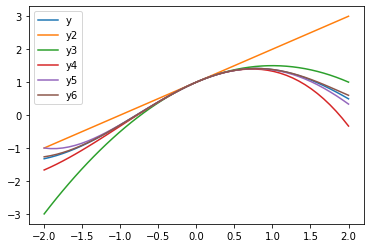

In [134]:
x = np.linspace(-2, 2, 50) #bounds chosen to highlight effectiveness of approximations
yfunc = (np.sin(x) + np.cos(x))

x0 = 0

y2 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) ) 
y3 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) + (((x-x0)**2)/math.factorial(2))*(-np.sin(x0)-np.cos(x0)) )  
y4 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) + (((x-x0)**2)/math.factorial(2))*(-np.sin(x0)-np.cos(x0)) + (((x-x0)**3)/math.factorial(3))*(-np.cos(x0)+np.sin(x0)) )  
y5 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) + (((x-x0)**2)/math.factorial(2))*(-np.sin(x0)-np.cos(x0)) + (((x-x0)**3)/math.factorial(3))*(-np.cos(x0)+np.sin(x0)) + (((x-x0)**4)/math.factorial(4))*(np.sin(x0)+np.cos(x0)) )  
y6 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) + (((x-x0)**2)/math.factorial(2))*(-np.sin(x0)-np.cos(x0)) + (((x-x0)**3)/math.factorial(3))*(-np.cos(x0)+np.sin(x0)) + (((x-x0)**4)/math.factorial(4))*(np.sin(x0)+np.cos(x0))  + (((x-x0)**5)/math.factorial(5))*(np.cos(x0)-np.sin(x0)) )  

plt.plot(x,yfunc, label='y')
plt.plot(x, y2,label='y2')
plt.plot(x, y3, label='y3')
plt.plot(x, y4, label='y4')
plt.plot(x, y5, label='y5')
plt.plot(x, y6, label='y6')
# plt.plot(0,1,'bo')
plt.legend()
plt.show()

It can be difficult to see how much "better" each successive approximation is over even a small interval about $x_0 = 0$ as Taylor expansions quickly become effective with only a few terms. The bounds for $x$ shown on the above plot of $(-2,2) $ were chosen to try to show the differences while also showing all the plots. Any closer bounds such as $(-1,1)$ show several of the plots overlapping and/or invisible.

c) Approximate the function with the first 2, 3, 4, 5, and 6 terms of its Taylor series expansion about point $x_0 = \frac{\pi}{4}$. Let’s call these approximations $y_2, y_3, y_4, y_5, y_6$ respectively. Plot $y, y_2, y_3, y_4, y_5, y_6$
for $0\le x \le 2\pi$ showing the approximation improving as more terms are
taken into consideration in the Taylor series.

> We have already built the Taylor expansion above, so we will now apply the same technique with a new $x_0$.

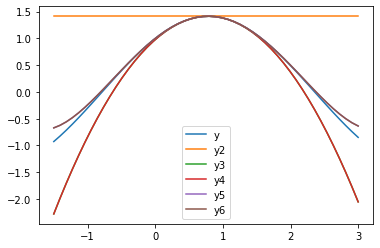

In [135]:
x = np.linspace(-1.5, 3, 50) #bounds chosen to highlight effectiveness of approximations
yfunc = (np.sin(x) + np.cos(x))

x0 = (np.pi/4)

y2 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) ) 
y3 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) + (((x-x0)**2)/math.factorial(2))*(-np.sin(x0)-np.cos(x0)) )  
y4 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) + (((x-x0)**2)/math.factorial(2))*(-np.sin(x0)-np.cos(x0)) + (((x-x0)**3)/math.factorial(3))*(-np.cos(x0)+np.sin(x0)) )  
y5 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) + (((x-x0)**2)/math.factorial(2))*(-np.sin(x0)-np.cos(x0)) + (((x-x0)**3)/math.factorial(3))*(-np.cos(x0)+np.sin(x0)) + (((x-x0)**4)/math.factorial(4))*(np.sin(x0)+np.cos(x0)) )  
y6 = ( np.sin(x0)+np.cos(x0) + (x-x0)*(np.cos(x0)-np.sin(x0)) + (((x-x0)**2)/math.factorial(2))*(-np.sin(x0)-np.cos(x0)) + (((x-x0)**3)/math.factorial(3))*(-np.cos(x0)+np.sin(x0)) + (((x-x0)**4)/math.factorial(4))*(np.sin(x0)+np.cos(x0))  + (((x-x0)**5)/math.factorial(5))*(np.cos(x0)-np.sin(x0)) )  

plt.plot(x,yfunc, label='y')
plt.plot(x, y2,label='y2')
plt.plot(x, y3, label='y3')
plt.plot(x, y4, label='y4')
plt.plot(x, y5, label='y5')
plt.plot(x, y6, label='y6')
plt.legend()
plt.show()

As before, the difference in effectiveness between the number of terms in our approximations quickly becomes hard to see. A tighter domain around our new $x_0$ just hides even more of the plots as they stack upon each other.

##Q4:
Consider the nonlinear function: 
> $ f(x) = x^3[cos(x)] $

a) Plot $y$ as a function of $x$ as $x$ is varied between $-6\pi$ and $6\pi$. In this plot mark all the locations of $x$ where $y = 0$. These locations are some of the roots of the above equation.

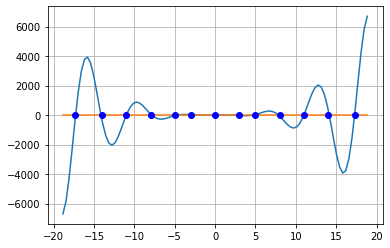

In [136]:
x = np.linspace(-np.pi*6, np.pi*6, 100)
yfunc = (x**3*np.cos(x))

plt.plot(x,yfunc,x,x*0)
plt.plot(-17.3,0,'bo',-14,0,'bo',-11,0,'bo',-8,0,'bo',-5,0,'bo',-3,0,'bo')
plt.plot(0,0,'bo',3,0,'bo',5,0,'bo',8,0,'bo',11,0,'bo',14,0,'bo',17.3,0,'bo')
plt.grid(True)
plt.show()
# the above mark points were obtained by visual inspection


The above plotted root points were obtained with visual inspection: 
$x = {-17.3, -14, -11, -8, -5, -3, 0, 3, 5, 8, 11, 14, 17.3}$

There may be more that are difficult to see due to the scale of the graph over this domain.

b) Use fsolve in Python to solve for all the roots of the above equation between $-6\pi$ and $6\pi$. These should match the results you get in 'a'.

In [ ]:
x = np.linspace(-np.pi*6, np.pi*6, 20)

def oneEquation(z):
  a = z[0]
  F= np.empty((1))
  F[0] = a**3*np.cos(a)
  return F 

allRoots = []
rootArray = np.array([[]])
nextroot = 0.

for n in x:  # recursion to use fsolve over whole specified interval. Guess granularity is chosen when x is defined with linspace.
  nextroot = np.round(fsolve(oneEquation,n),decimals=6)
  if (nextroot[0] not in allRoots):
    allRoots.append(nextroot[0])
  rootArray = np.append(rootArray, nextroot)

allRoots.sort()

#print(rootArray, '\n')
print("The roots of the function on the specified interval are: \n", allRoots, '\n')

The roots of the function on the specified interval are: 
 [-17.27876, -14.137167, -10.995574, -7.853982, -4.712389, -1.570796, -0.0, 1.570796, 4.712389, 7.853982, 10.995574, 14.137167, 17.27876] 



/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


The roots found by the code above generally match up with the ones found by visual inspection, with some variation in precision of course.

Using fsolve in this manner is very resource intensive, so the program throws a runtime warning.

##Q5:

Find the solutions of the following system of nonlinear equations:
>$ y = -2x-4 \\ y = x^2-4 $

> By hand, the solutions are straightforward for this system by substitution:

> $$ -2x-4 = x^2 -4 \\ x^2 + 2x = 0 \\ x(x+2) = 0 \\ x=\{-2,0\} $$


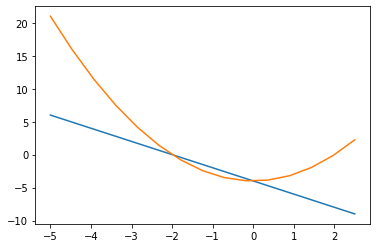

The solutions for x to the system of equations:  [-2.  0.]

Substituting these solutions back in to verify: 
 [0. 0.] 



In [ ]:
# This was based directly on the in-class example given

x = np.linspace(-5,2.5,15)
y = np.linspace(-5,10,15)

f1 = -2*x-4
f2 = x**2 - 4

plt.plot(x,f1,x,f2) # looking at the two functions to visualize them better
plt.show()

def twoEquation(z):
  x = z[0]
  y = z[1]
  F = np.empty((2))
  F[0] = x*(-2) - 4 - y
  F[1] = x**2 - 4 - y
  return F

zGuess = np.array([-1,0])  
z = np.round(fsolve(twoEquation,zGuess), decimals=8)
print("The solutions for x to the system of equations: ", z) 
print("\nSubstituting these solutions back in to verify: \n", twoEquation(z), '\n')

We can see this found the same roots as above.

## Q6:
Determine the dimensions of a cylindrical can whose volume is 1.5 liters and which has the minimum amount of surface area. Find this minimum value of the surface and show that it is, in fact, the minimum and not the maximum. [Hint: The variables are the radius $r$ and height $h$. Write the expressions for the surface area and volume in terms of $r,h$. Use the given volume to express the surface area in terms of one variable. Now find the value of that variable by minimizing the surface area.]

> One liter = 0.001 cubic meters. Our target volume is 1.5 liters, or 0.0015 cubic meters.
>
> Volume of a cylinder is given by: 
> $$ \pi r^2h $$
> Surface Area of a cylinder is given by:
> $$ 2\pi rh + 2\pi r^2$$
> otherwise, 
> $$ 2\pi (r^2 + rh) $$
>
> We can use the constraint $Volume = .0015 =  \pi r^2h$ to derive an expression for h: 
> $$ h = \frac{1.5}{\pi r^2} $$
>
> Substituting this into the surface area expression and simplifying:
> $$ SA = 2\pi(r^2 + \frac{.0015}{\pi r}) $$

In [ ]:
def surfArea(z):
  r = z[0]
  F = np.empty((1))
  F[0] = 2*np.pi*(r**2+.0015/(r*np.pi))
  return F

zGuess = np.array([0.1])
z = op.minimize(surfArea, zGuess)
print(z)
x = np.round(z.x, decimals=6)

# try vars on either side and show they are higher

print("\nThe optimal solution given by scipy optimize is ", x[0], " meters, or ", x[0]*100, "centimeters, and to verify this is indeed a minimum (not maximum) we can evaluate the function using values on either side.")
print("\nLow value for radius: ", x[0]-0.02, "m evaluates to: ", surfArea(x-0.02)[0], " square meters.")
print("\nOptimal radius: ", x[0], "m evaluates to: ", surfArea(x)[0], " square meters.")
print("\nHigh value for radius: ", x[0]+0.02, "m evaluates to: ", surfArea(x+0.02)[0], " square meters.")


      fun: 0.07253963793075167
 hess_inv: array([[0.02659948]])
      jac: array([-6.10947609e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([0.06203503])

The optimal solution given by scipy optimize is  0.062035  meters, or  6.2035 centimeters, and to verify this is indeed a minimum (not maximum) we can evaluate the function using values on either side.

Low value for radius:  0.042035 m evaluates to:  0.08247111632449056  square meters.

Optimal radius:  0.062035 m evaluates to:  0.07253963793078656  square meters.

High value for radius:  0.082035 m evaluates to:  0.07885396799715796  square meters.


> As we can see, values on either side of the given optimal value evaluate to higher surface areas, confirming that our solution is a minimum.

##Q7:

A piece of cardboard must be folded in the following fashion: 

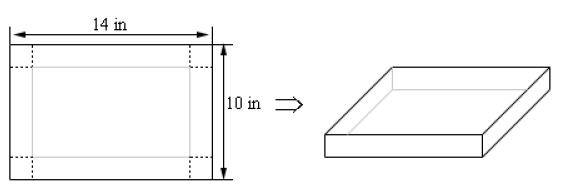

Determine the height of the box which will maximize its volume. Find this maximum value of the volume and show that it is, in fact, the maximum and not the minimium.

> If we consider the height as $h$, the volume of the box will be:
> $$Vol = h(14-2h)(10-2h) $$

In [ ]:
def boxVol(z): 
  h = z[0]
  return (h*(14-2*h)*(10-2*h)) # standard function

def boxVolNeg(z): 
  h = z[0]
  return -(h*(14-2*h)*(10-2*h)) # negative of the expression in order to use op.minimize

zGuess = np.array([3])
z = op.minimize(boxVolNeg, zGuess)
x = np.round(z.x, decimals=6)

print(z)

# try other nearby values to verify maximum

print("\nThe optimal solution given by scipy optimize is ", x[0], " inches, and to verify this is indeed a maximum (not minimum) we can evaluate the function using values on either side.")
print("\nLow value for height: ", x[0]-0.4, "inches evaluates to: ", boxVol(x-0.4), " cubic inches.")
print("\nOptimal height: ", x[0], "inches evaluates to: ", boxVol(x), " cubic inches.")
print("\nHigh value for height: ", x[0]+0.4, "inches evaluates to: ", boxVol(x+0.4), " cubic inches.")

      fun: -120.16442131482594
 hess_inv: array([[0.02001786]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([1.918334])

The optimal solution given by scipy optimize is  1.918334  inches, and to verify this is indeed a maximum (not minimum) we can evaluate the function using values on either side.

Low value for height:  1.5183339999999999 inches evaluates to:  115.91162258415714  cubic inches.

Optimal height:  1.918334 inches evaluates to:  120.16442131482594  cubic inches.

High value for height:  2.318334 inches evaluates to:  116.42362260549474  cubic inches.


> We can see here that the volume function evaluates lower using height values above and below the solved optimum, validating that this is in fact a maximum.

##Q8:

Consider the following: 

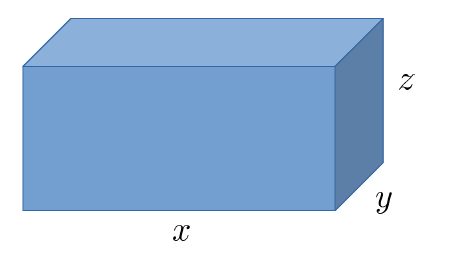

You are given that the volume of the above box is $1000cm^3$. Find the dimensions $x, y, z$ such that the total surface area of all the faces of the box is minimum.

> Volume of the box is given by the expression
> $$Volume = xyz = 1000 cm^3$$
>
> Surface area is given by the expression
> $$ SA = 2xy + 2yz + 2xz $$
>
> We can use the volume constraint to substitute one of the variables:
> $$ x = \frac{1000}{yz} $$
>
> This is substituted into the Surface area equation and simplified, yielding
> $$ SA = \frac{2000}{z} + 2yz + \frac{2000}{y} $$
>
> We can then minimize this expression.

In [155]:
def surfArea(dims):
  y = dims[0]
  z = dims[1]
  F = (2000/z) + 2*y*z + (2000/y)
  return F 

dimGuess = np.array([1.,3.])
result = op.minimize(surfArea, dimGuess)
minDim = np.round(result.x, decimals=5)
y = minDim[0]
z = minDim[1]
x = 1000/(y*z)

print("The optimal dimensions for x, y, z to minimize surface area are: \n")
print("x:", x, "cm")
print("y:", y, "cm")
print("z:", z, "cm")
print("The minimized surface area is ", np.round(surfArea(result.x), decimals=4), "cm^2")
print("Such that a volume of 1000 cm^3 is maintained.")


The optimal dimensions for x, y, z to minimize surface area are: 

x: 10.0 cm
y: 10.0 cm
z: 10.0 cm
The minimized surface area is  600.0 cm^2
Such that a volume of 1000 cm^3 is maintained.
